In [1]:
# Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Get data from github
url ="https://raw.githubusercontent.com/asukul/DS301-f19/master/datasets/Brain-BodySize/brain-bodysize.csv"

In [3]:
data = pd.read_csv(url)

In [4]:
# Explore data
data.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [5]:
# Assign data to X and Y variables
X = data[["Brain"]]
Y = data[["Body"]]

In [6]:
print(X)

      Brain
0     3.385
1     0.480
2     1.350
3   465.000
4    36.330
5    27.660
6    14.830
7     1.040
8     4.190
9     0.425
10    0.101
11    0.920
12    1.000
13    0.005
14    0.060
15    3.500
16    2.000
17    1.700
18    0.023
19  187.100
20  521.000
21    0.785
22   10.000
23    3.300
24    0.200
25    1.410
26  529.000
27  207.000
28   85.000
29    0.750
30   62.000
31    3.500
32    6.800
33   35.000
34    4.050
35    0.120
36    0.023
37    0.010
38    1.400
39  250.000
40    2.500
41   55.500
42  100.000
43   52.160
44   10.550
45    0.550
46   60.000
47    3.600
48    4.288
49    0.280
50    0.075
51    0.122
52    0.048
53  192.000
54    3.000
55  160.000
56    0.900
57    1.620
58    0.104
59    4.235


In [7]:
print(Y)

       Body
0     44.50
1     15.50
2      8.10
3    423.00
4    119.50
5    115.00
6     98.20
7      5.50
8     58.00
9      6.40
10     4.00
11     5.70
12     6.60
13     0.14
14     1.00
15    10.80
16    12.30
17     6.30
18     0.30
19   419.00
20   655.00
21     3.50
22   115.00
23    25.60
24     5.00
25    17.50
26   680.00
27   406.00
28   325.00
29    12.30
30  1320.00
31     3.90
32   179.00
33    56.00
34    17.00
35     1.00
36     0.40
37     0.25
38    12.50
39   490.00
40    12.10
41   175.00
42   157.00
43   440.00
44   179.50
45     2.40
46    81.00
47    21.00
48    39.20
49     1.90
50     1.20
51     3.00
52     0.33
53   180.00
54    25.00
55   169.00
56     2.60
57    11.40
58     2.50
59    50.40


##### Data visulaization with matplotlib

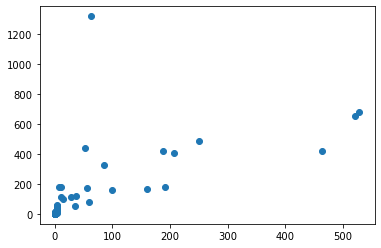

In [8]:
# Create a scatter plot 
plt.scatter(X,Y)
plt.show()

<AxesSubplot:xlabel='Brain', ylabel='Body'>

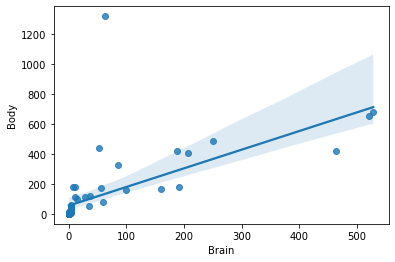

In [9]:
# Scatter plot with linear regression
import seaborn as sns
sns.regplot(data=data, x='Brain', y='Body')

##### Fit a linear model

In [10]:
model1 =linear_model.LinearRegression().fit(X,Y)
model1.score(X,Y)

0.42322727989153086

##### Making predictions for three new values (X)s

In [11]:
new1 = np.array([[2.8]])
model1.predict(new1)

array([[59.43145292]])

In [12]:
new2 = np.array([[5.6]])
model1.predict(new2)

array([[62.91104865]])

In [13]:
new3 = np.array([[40]])
model1.predict(new3)

array([[105.66036763]])

##### Calculate RMSE, and R2

In [14]:
# Split data into train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.3, random_state=90)
# Fit a model
model2 = linear_model.LinearRegression().fit(X_train, Y_train)
#Make predictions based on X_test
Y_pred = model2.predict(np.array(X_test))

In [15]:
Y_pred

array([[ 65.22761336],
       [ 69.93823813],
       [ 69.37596196],
       [ 65.12765315],
       [715.86860303],
       [264.79816734],
       [ 64.90649119],
       [ 99.43899433],
       [ 77.37277855],
       [ 78.06000498],
       [ 67.00190704],
       [ 65.85861217],
       [ 64.93772876],
       [171.08547295],
       [108.61034335],
       [ 66.17723533],
       [ 68.00150911],
       [ 65.0077009 ]])

In [16]:
print ("MSE", mean_squared_error(y_true = Y_test, y_pred = Y_pred))

MSE 5037.706956594284


In [17]:
# Calculate R2
print ("R2", r2_score(y_true = Y_test, y_pred = Y_pred))

R2 0.8059655506986935


### Data Transformation: normalization

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
std = StandardScaler()
std_X = std.fit(X_train, X_test)
std_norm_X_train = std.transform(X_train)
std_norm_X_test = std.transform(X_test)

print(X_test, "\n", std_norm_X_test)

      Brain
49    0.280
34    4.050
47    3.600
24    0.200
20  521.000
55  160.000
36    0.023
5    27.660
22   10.000
44   10.550
17    1.700
21    0.785
52    0.048
28   85.000
33   35.000
7     1.040
40    2.500
58    0.104 
 [[-0.45695232]
 [-0.42477617]
 [-0.42861683]
 [-0.4576351 ]
 [ 3.98728224]
 [ 0.90622394]
 [-0.45914576]
 [-0.22326984]
 [-0.37399419]
 [-0.36930005]
 [-0.44483292]
 [-0.45264225]
 [-0.45893239]
 [ 0.26611488]
 [-0.1606245 ]
 [-0.45046588]
 [-0.43800509]
 [-0.45845444]]


In [20]:
model3 =linear_model.LinearRegression().fit(std_norm_X_train, Y_train)
model3.score(std_norm_X_train, Y_train)

0.3479682722602244